# Importing necessary libraries


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [6]:
data=pd.read_csv('weather_data.csv')
data.head(5)

,rain,visibility,wind_speed_180m,temperature_180m,Safety_status
0,0.000000,22547.620,27.525797,21.773237,Safe
1,0.000000,22547.620,27.525797,21.773237,Safe
2,0.000000,23186.904,22.999079,28.073574,Safe
3,0.011905,26040.238,23.307661,19.807930,Safe
4,0.012500,14156.429,18.064410,23.808216,Safe


# Acquiring details of the dataset

In [11]:
#number of rows and columns
print(data.shape)

#column names
print(data.columns)

(50, 5)
Index(['rain', 'visibility', 'wind_speed_180m', 'temperature_180m',
       'Safety_status'],
      dtype='object')


In [12]:
data.describe

<bound method NDFrame.describe of         rain   visibility  wind_speed_180m  temperature_180m Safety_status
0   0.000000  22547.62000        27.525797         21.773237          Safe
1   0.000000  22547.62000        27.525797         21.773237          Safe
2   0.000000  23186.90400        22.999079         28.073574          Safe
3   0.011905  26040.23800        23.307661         19.807930          Safe
4   0.012500  14156.42900        18.064410         23.808216          Safe
5   0.018452  21815.71484        20.671383         24.537449          Safe
6   0.013690   8321.30957        15.447268         23.415356          Safe
7   0.000000  22097.14258         9.404426         23.756523          Safe
8   0.001786  22658.69141         6.371725         26.779739          Safe
9   0.030357  22113.45313        16.275839         26.453712          Safe
10  0.100000  23641.07227         4.040880         20.664286          Safe
11  0.000000  23939.52344        30.509876         21.798452      

# Checking for null values

In [13]:
data.isnull().sum()

rain                0
visibility          0
wind_speed_180m     0
temperature_180m    0
Safety_status       0
dtype: int64

# Exploratory Data Analysis (EDA)

# Histograms

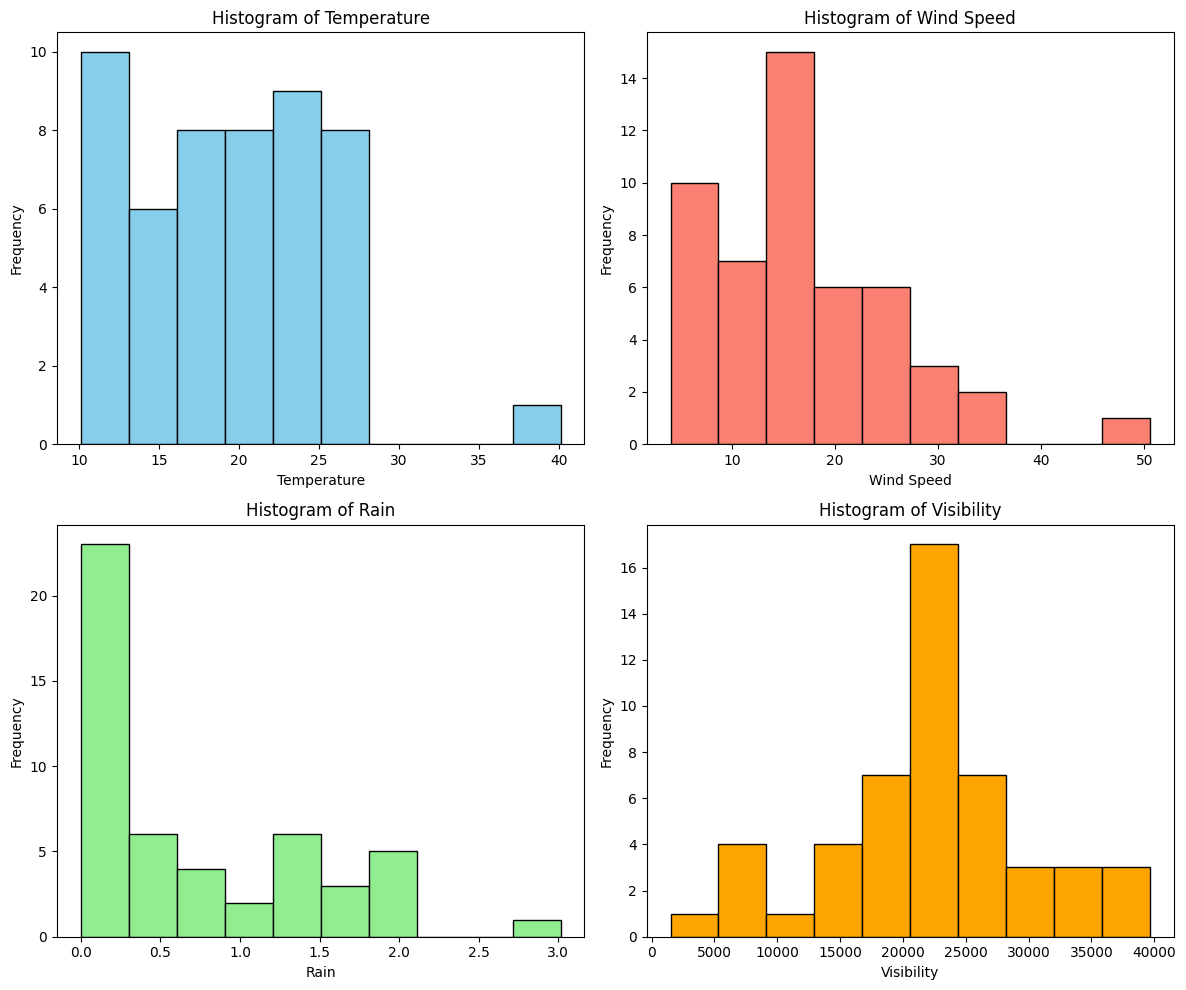

In [18]:
# Create histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Temperature
axs[0, 0].hist(data['temperature_180m'], bins=10, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Histogram of Temperature')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Frequency')

# Histogram for Wind Speed
axs[0, 1].hist(data['wind_speed_180m'], bins=10, color='salmon', edgecolor='black')
axs[0, 1].set_title('Histogram of Wind Speed')
axs[0, 1].set_xlabel('Wind Speed')
axs[0, 1].set_ylabel('Frequency')

# Histogram for Rain
axs[1, 0].hist(data['rain'], bins=10, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Histogram of Rain')
axs[1, 0].set_xlabel('Rain')
axs[1, 0].set_ylabel('Frequency')

# Histogram for Visibility
axs[1, 1].hist(data['visibility'], bins=10, color='orange', edgecolor='black')
axs[1, 1].set_title('Histogram of Visibility')
axs[1, 1].set_xlabel('Visibility')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Box plots

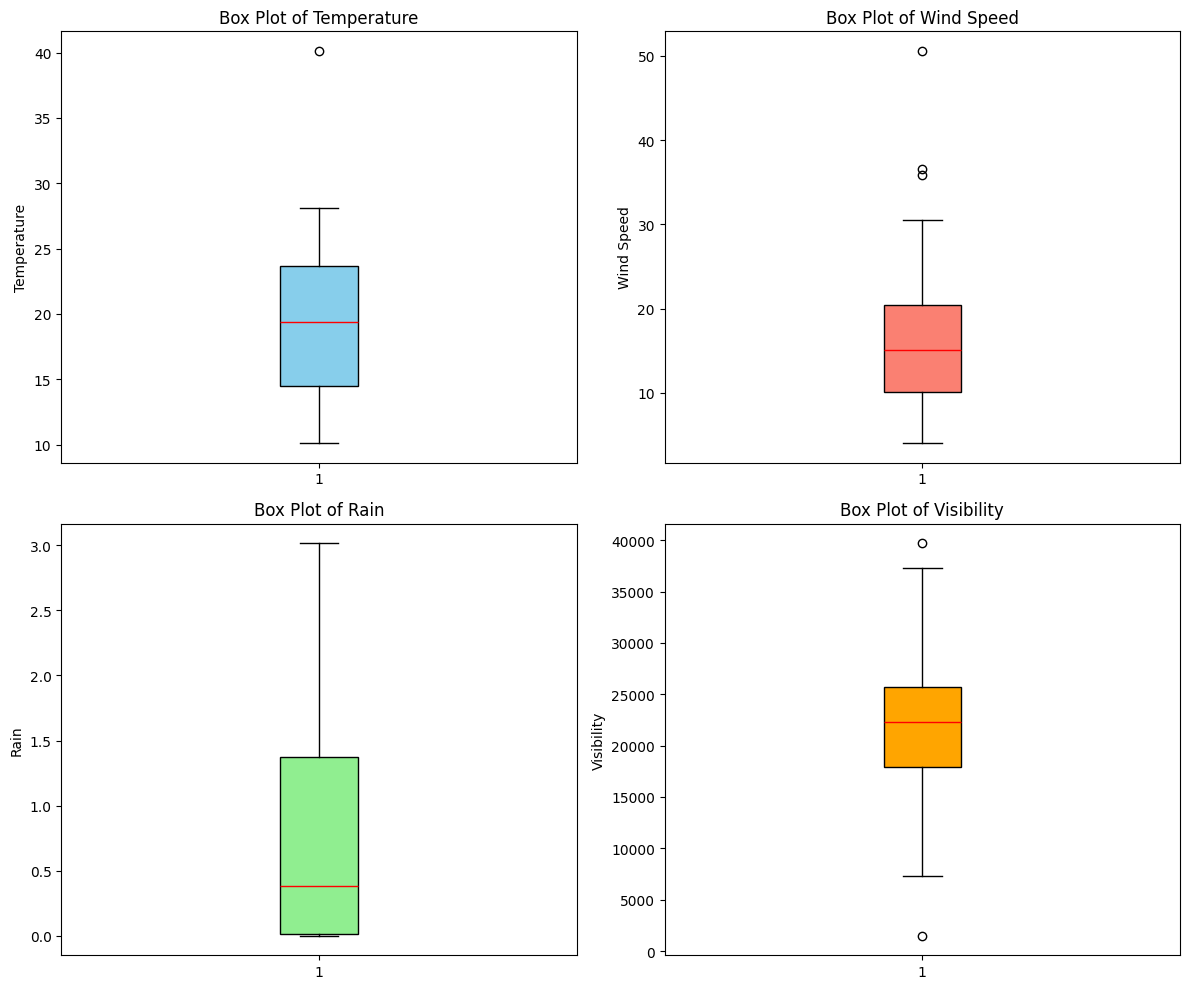

In [19]:
# Create box plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Box plot for Temperature
axs[0, 0].boxplot(data['temperature_180m'], patch_artist=True, 
                   boxprops=dict(facecolor='skyblue', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='red'))
axs[0, 0].set_title('Box Plot of Temperature')
axs[0, 0].set_ylabel('Temperature')

# Box plot for Wind Speed
axs[0, 1].boxplot(data['wind_speed_180m'], patch_artist=True, 
                   boxprops=dict(facecolor='salmon', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='red'))
axs[0, 1].set_title('Box Plot of Wind Speed')
axs[0, 1].set_ylabel('Wind Speed')

# Box plot for Rain
axs[1, 0].boxplot(data['rain'], patch_artist=True, 
                   boxprops=dict(facecolor='lightgreen', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='red'))
axs[1, 0].set_title('Box Plot of Rain')
axs[1, 0].set_ylabel('Rain')

# Box plot for Visibility
axs[1, 1].boxplot(data['visibility'], patch_artist=True, 
                   boxprops=dict(facecolor='orange', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='red'))
axs[1, 1].set_title('Box Plot of Visibility')
axs[1, 1].set_ylabel('Visibility')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Pair Plot (Scatter plot matrix)

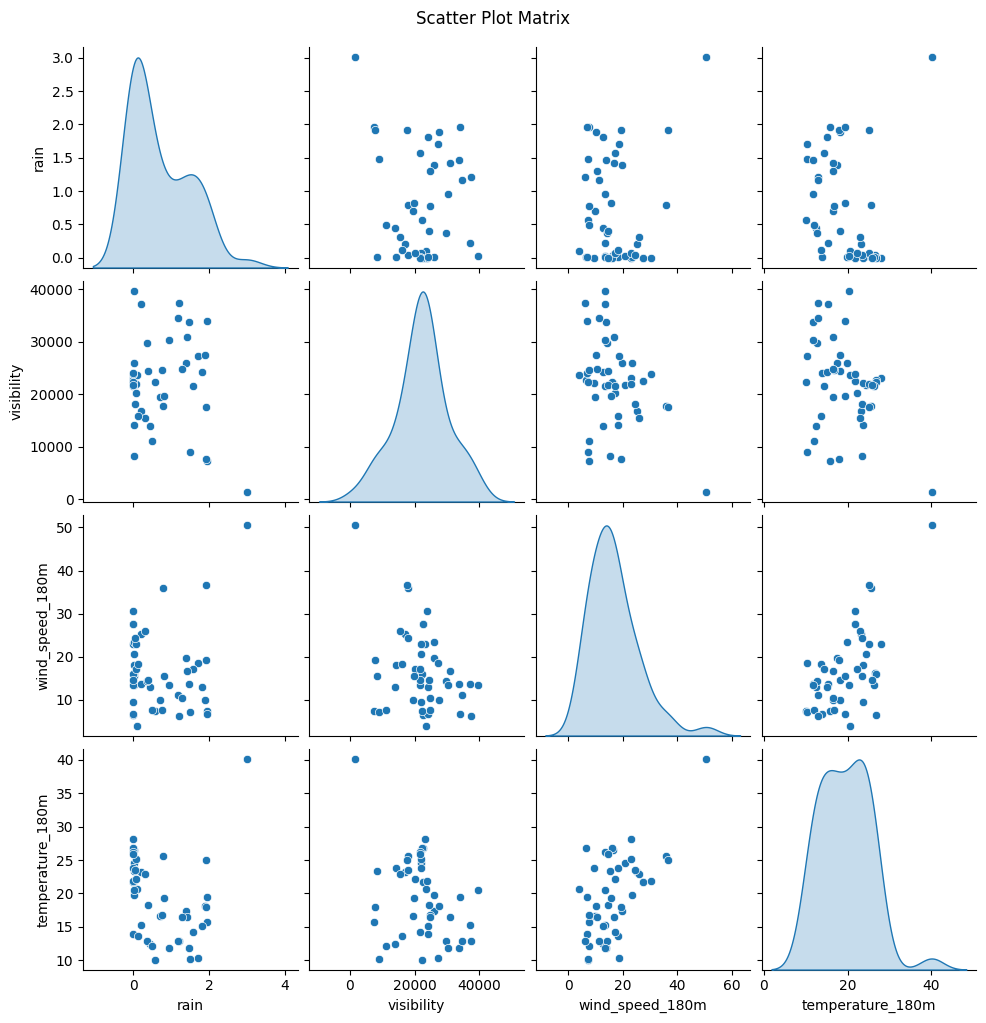

In [23]:
# Drop the column with string values
data_numeric = data.select_dtypes(include=[float, int])

# Create a scatter plot matrix (pair plot)
sns.pairplot(data_numeric, diag_kind='kde', markers='o', hue=None)

# Set title and labels
plt.suptitle('Scatter Plot Matrix', y=1.02)

# Show plot
plt.show()

# Line Plots

* shows the trends in variables over time

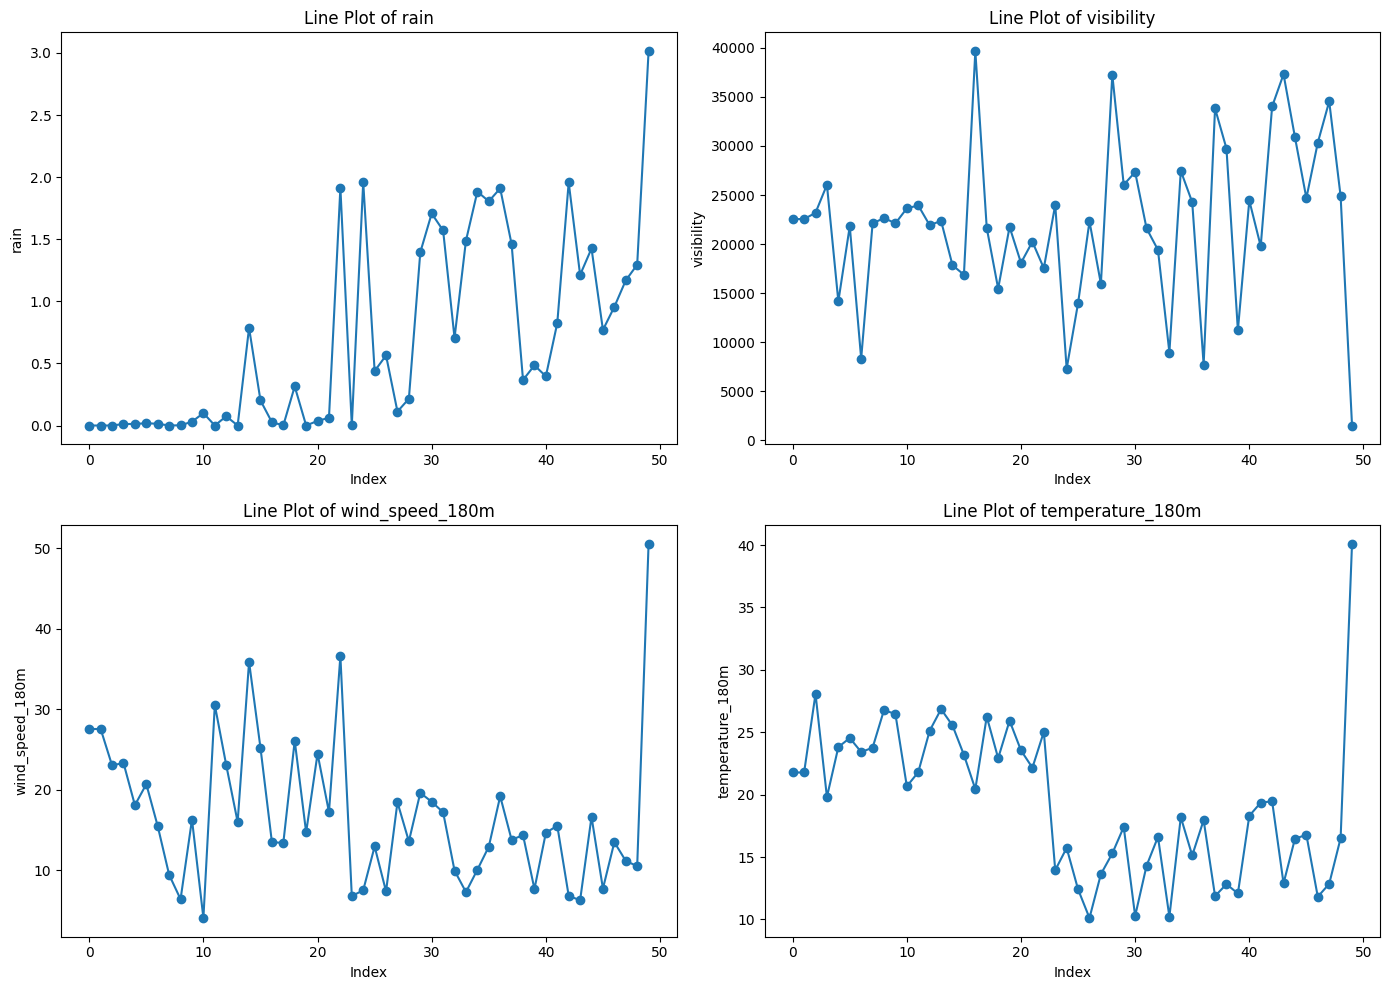

In [24]:
# Drop the column with string values
data_numeric = data.select_dtypes(include=[float, int])

# Create line plots for each numeric variable
plt.figure(figsize=(14, 10))

for i, column in enumerate(data_numeric.columns, start=1):
    plt.subplot(2, 2, i)
    plt.plot(data_numeric[column], marker='o', linestyle='-')
    plt.title(f'Line Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Density Plots

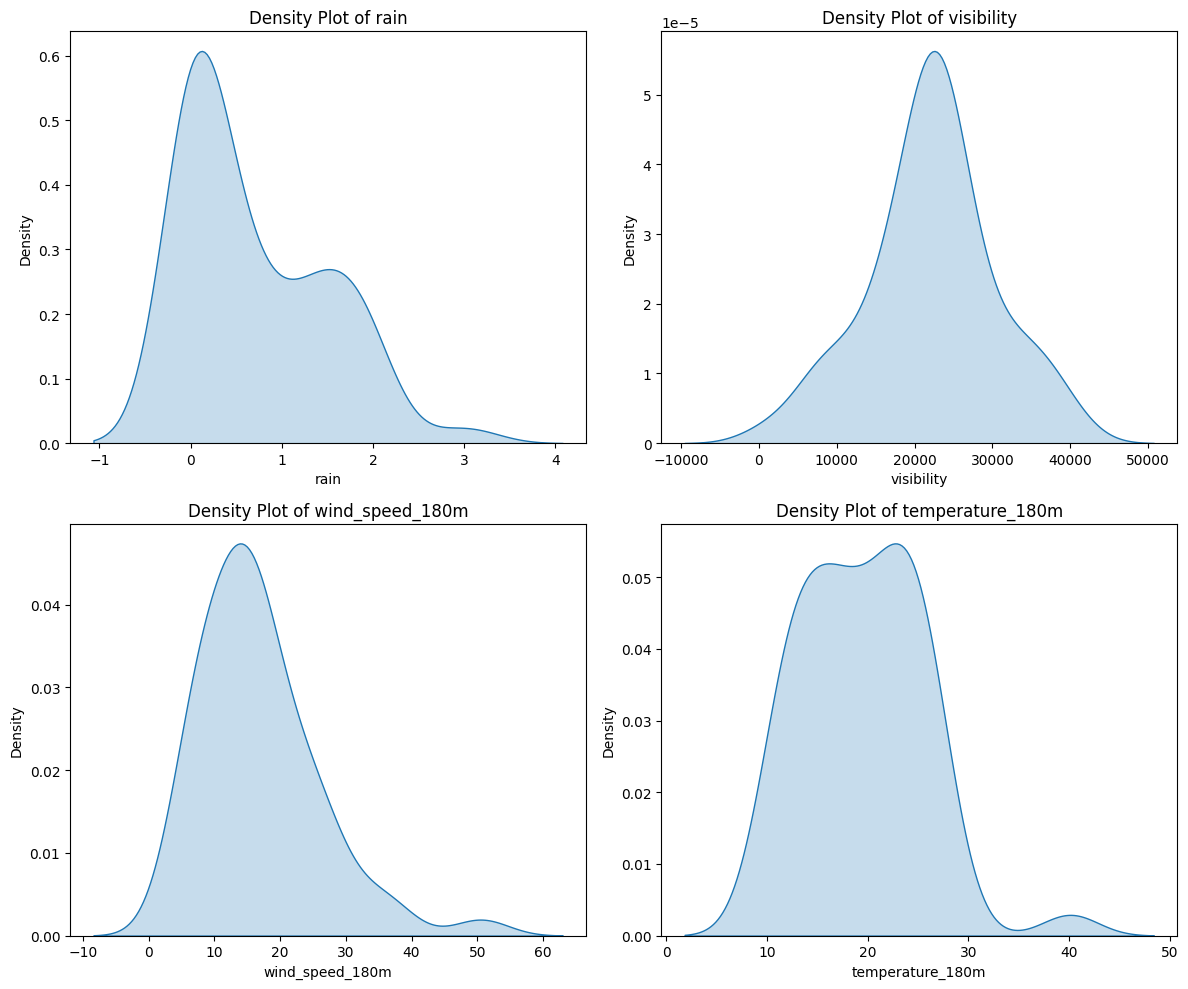

In [25]:
# Drop the column with string values
data_numeric = data.select_dtypes(include=[float, int])

# Create density plots for each numeric variable
plt.figure(figsize=(12, 10))

for i, column in enumerate(data_numeric.columns, start=1):
    plt.subplot(2, 2, i)
    sns.kdeplot(data_numeric[column], fill=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# HeatMap

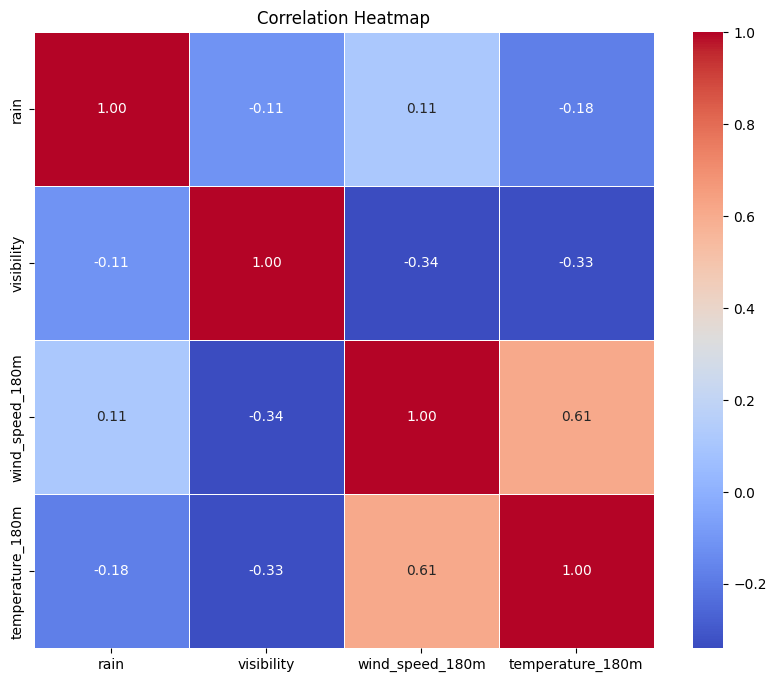

In [22]:
# Drop the column with string values
data_numeric = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = data_numeric.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap')
plt.show()

# Logistic Regression Model

Importing necessary libraries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
X = data[['rain', 'visibility', 'wind_speed_180m', 'temperature_180m']]
y = data['Safety_status']

Preprocess the data

In [28]:
# Encode target variable if it's not numeric
y = y.map({'Safe': 0, 'Unsafe': 1})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training the model

In [29]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Making predictions and evaluating the model

In [32]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

